In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import inspect
from scipy import linalg
import math
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from scipy import linalg


# Data loading video frames and refrance image

In [ ]:
def video_loader(path):
  # Open the video file
	cap = cv2.VideoCapture(path)

	# Check if camera opened successfully
	if (cap.isOpened()== False):
		print("Error opening video stream or file")

	i = 0
	# Read until video is completed
	while(cap.isOpened()):
		# Capture frame-by-frame
		i += 1
		ret, frame = cap.read()
		if ret == True:
			#Store the resulting frame
			if i == 1:
				frames = frame[np.newaxis, ...]
			else:
				frame = frame[np.newaxis, ...]
				frames = np.vstack([frames, frame])
				frames = np.squeeze(frames)

		else:
			break

	# When everything done, release the video capture object
	cap.release()

	return frames

In [ ]:
image_reference = cv2.imread("/content/refrenceImage.png")
ar_source = video_loader("/content/ar_source.mov")
book_video= video_loader("/content/book.mov")



## 1.1 Getting Correspondences
The first step is to find the correspondences between the image book (Figure 2.a) and the
first frame of the video. Use SIFT descriptor from opencv library to find keypoints in each
image and then use the brute force matcher from opencv to get the correspondences. Use the
matching way as KNN with size 2, and apply ratio checking between the best 2 matches to
filter the good correspondences.


In [ ]:
def sift_descriptor(image):
  # convert the image input into gray scale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  sift = cv2.SIFT_create()
  keypoints, descriptors = sift.detectAndCompute(gray, None)
  sift_image = cv2.drawKeypoints(image, keypoints, 0)
  return sift_image, keypoints, descriptors

(-0.5, 639.5, 479.5, -0.5)

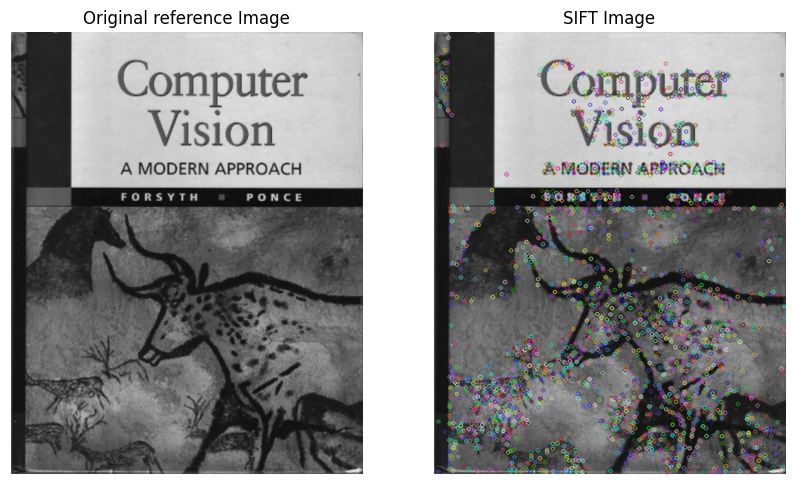

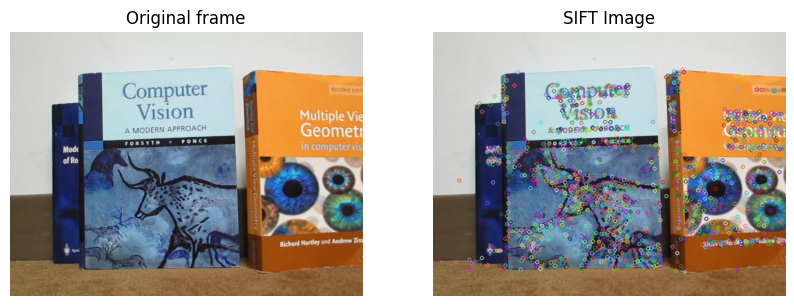

In [ ]:
sift_image1, keypoints1, descriptors1 = sift_descriptor(image_reference)
sift_image2, keypoints2, descriptors2 = sift_descriptor(book_video[0])

# Create a figure for displaying images side by side using Matplotlib
plt.figure(figsize=(10, 7))  # Set the figure size
# Original Image
plt.subplot(1, 2, 1)  # Create the first subplot in a 1x3 grid
plt.imshow(image_reference)  # Display the original image in RGB format
plt.title("Original reference Image")  # Set the title for the subplot
plt.axis('off')  # Turn off the axis labels

# Grayscale Image
plt.subplot(1, 2, 2)  # Create the second subplot
plt.imshow(sift_image1)  # Display the grayscale image using a grayscale colormap
plt.title("SIFT Image")
plt.axis('off')


# Create a figure for displaying images side by side using Matplotlib
plt.figure(figsize=(10, 7))  # Set the figure size
# Original Image
plt.subplot(1, 2, 1)  # Create the first subplot in a 1x3 grid
plt.imshow(book_video[0])  # Display the original image in RGB format
plt.title("Original frame")  # Set the title for the subplot
plt.axis('off')  # Turn off the axis labels

# Grayscale Image
plt.subplot(1, 2, 2)  # Create the second subplot
plt.imshow(sift_image2)  # Display the grayscale image using a grayscale colormap
plt.title("SIFT Image")
plt.axis('off')



# After getting the keypoints and descriptors we need to match the two descriptors


In [ ]:
def find_matches(descriptors1, descriptors2, knn_size=2, ratio_threshold=0.7, num_matches=50):
    # Create a brute force matcher
    bf = cv2.BFMatcher()

    # Perform KNN matching
    matches = bf.knnMatch(descriptors1, descriptors2, k=knn_size)

    # Apply ratio test to filter good matches
    good_matches = []
    for m, n in matches:
        if m.distance < ratio_threshold * n.distance:
            good_matches.append(m)

    # Sort the matches based on their distances
    good_matches = sorted(good_matches, key=lambda x: x.distance)

    # Choose a specified number of correspondences (e.g., 50)
    selected_matches = good_matches[:num_matches]

    return selected_matches

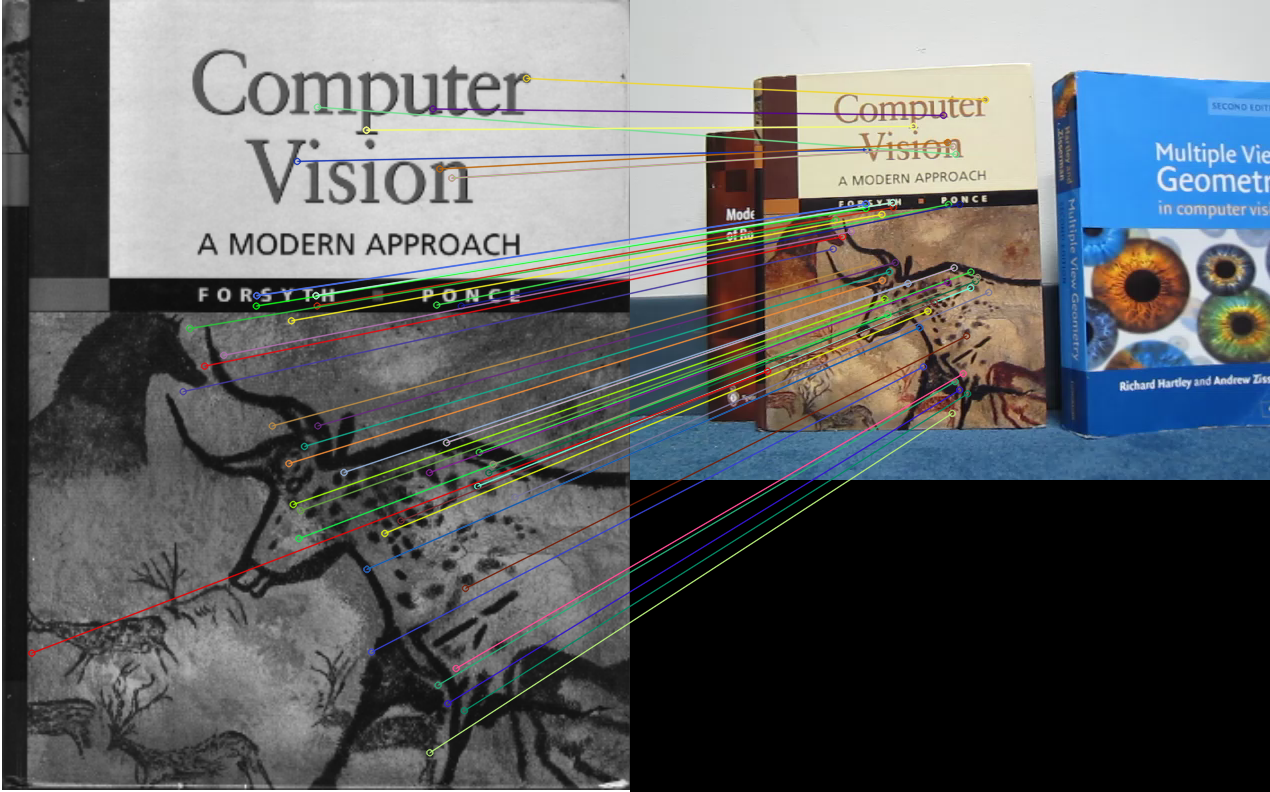

In [ ]:
matches = find_matches(descriptors1, descriptors2)
# Draw the matches
img_matches = cv2.drawMatches(image_reference, keypoints1, book_video[0], keypoints2, matches, None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# Display the result
cv2_imshow(img_matches)